# Lab07-Image Processing and Analysis

In [1]:
"""
Họ và Tên: Nguyễn Quang Trường
MSSV: 21110429
Dip lab07
"""

'\nHọ và Tên: Nguyễn Quang Trường\nMSSV: 21110429\nDip lab07\n'

In [2]:
import numpy as np 
import pandas as pd
import cv2 
from matplotlib import pyplot as plt 
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from pylab import imread
from skimage.color import rgb2gray

In [3]:
def ShowImage(ImageList, nRows = 1, nCols = 2, WidthSpace = 0.00, HeightSpace = 0.00):
    from matplotlib import pyplot as plt 
    import matplotlib.gridspec as gridspec
    
    gs = gridspec.GridSpec(nRows, nCols)     
    gs.update(wspace=WidthSpace, hspace=HeightSpace) # set the spacing between axes.
    plt.figure(figsize=(20,10))
    for i in range(len(ImageList)):
        ax1 = plt.subplot(gs[i])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')

        plt.subplot(nRows, nCols,i+1)

        image = ImageList[i].copy()
        if (len(image.shape) < 3):
            plt.imshow(image, plt.cm.gray)
        else:
            plt.imshow(image)
        plt.title("Image " + str(i))
        plt.axis('off')

    plt.show()


In [4]:
def InfoImage(IM):
    Image = IM
    Width = Image.shape[1]
    Height = Image.shape[0]
    Channel = len(Image.shape)
    print("Width : ", Width, " Height : ", Height, " Channel : ", Channel)
    
    if(Channel == 2):
        print("Min Intensity: ", IM.min(), " Max Intensity: ", IM.max())
    else:
        print("Red - Min Intensity: ", IM[:,:,0].min(), " Max Intensity: ", IM[:,:,0].max())
        print("Green - Min Intensity: ", IM[:,:,1].min(), " Max Intensity: ", IM[:,:,1].max())
        print("Blue - Min Intensity: ", IM[:,:,2].min(), " Max Intensity: ", IM[:,:,2].max())   

In [5]:
def ResizeImage(IM, DesiredWidth, DesiredHeight):
    from skimage.transform import rescale, resize
    
    OrigWidth = float(IM.shape[1])
    OrigHeight = float(IM.shape[0])
    Width = DesiredWidth 
    Height = DesiredHeight

    if((Width == 0) & (Height == 0)):
        return IM
    
    if(Width == 0):
        Width = int((OrigWidth * Height)/OrigHeight)

    if(Height == 0):
        Height = int((OrigHeight * Width)/OrigWidth)

    dim = (Width, Height)
    resizedIM = cv2.resize(IM, dim, interpolation = cv2.INTER_NEAREST) 
    return resizedIM

In [6]:
import warnings
warnings.filterwarnings("ignore")

## Câu 1: mỗi các phương pháp Morphology sau kiếm 1 ảnh từ internet làm ví dụ thể hiện rõ kết quả nhất 

### Dilation

Morphological dilation mở rộng kích thước của các đối tượng trong ảnh. Nó giúp làm cho các đối tượng trở nên lớn hơn và rõ ràng hơn.

Dilate (Làm đậm):

Tăng kích thước của vùng sáng trong hình ảnh.
Kết hợp các đối tượng gần nhau.

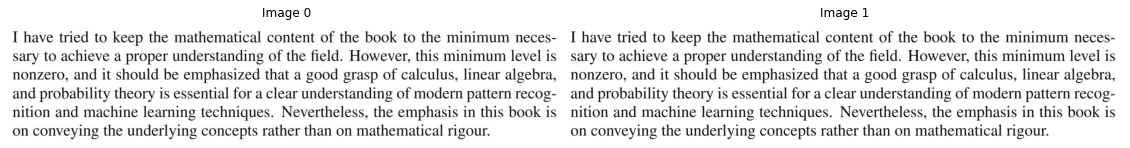

In [7]:
# Read Image 
image_color = imread("doc2.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
# Display Image
ShowImage([image_color, image_gray], 1, 2)

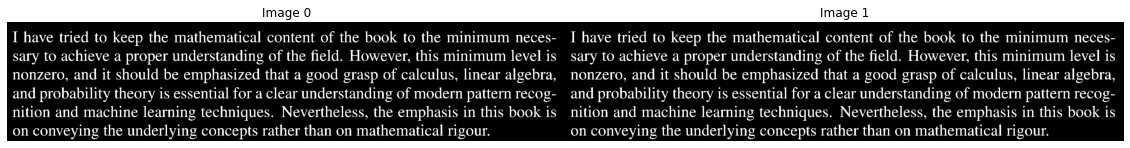

150.0


In [8]:
image_mask01 = (image_gray < 150).astype(np.uint8) * 255 # Change 0-1 to range 0-255
thresh, image_mask02 = cv2.threshold(image_gray,150,225,cv2.THRESH_BINARY_INV)
ShowImage([image_mask01, image_mask02], 1, 2)
print(thresh)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


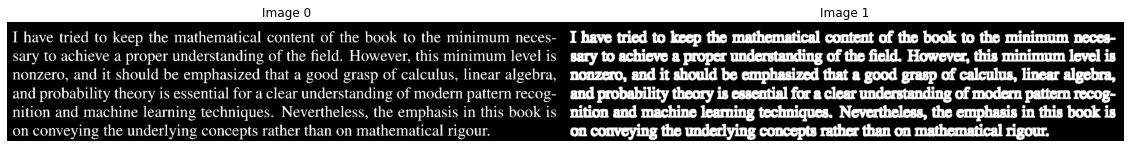

In [9]:
kernel = np.ones((3,3),np.uint8)
print(kernel)
image_dilated = cv2.dilate(image_mask01, kernel, iterations = 2)
ShowImage([image_mask01, image_dilated], 1, 2)

In [10]:
result = image_color.copy()

contours, hierarchy = cv2.findContours(image_dilated,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
count = 0
DataDF = pd.DataFrame(columns = ["x", "y", "w", "h"])
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    if(w * h > 300):
        cv2.rectangle(result,(x,y),(x+w,y+h),(0,255,0),2) 
        DataDF.loc[count,:] = (x,y,w,h)
        count = count + 1
DataDF = DataDF.astype(int)

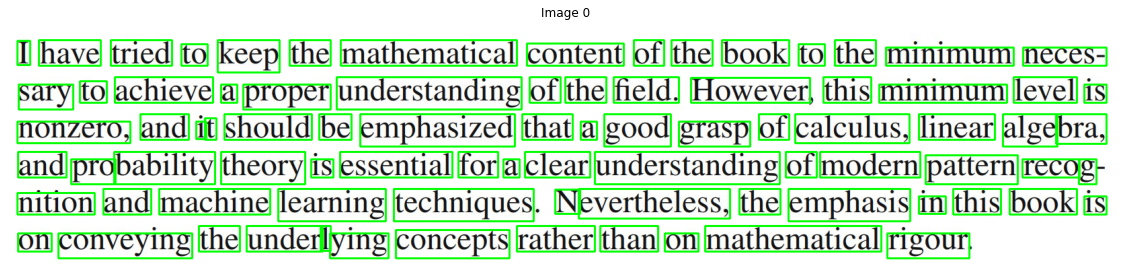

x    y    w   h
0  1309  312  122  37
1   978  312   50  27
2   480  312   87  37
3    76  312  199  37
4    16  312   50  27

In [11]:
ShowImage([result], 1, 1)
display(DataDF.head())

### Erosion

Tất cả các pixel gần biên giới sẽ bị loại bỏ tùy thuộc vào kích thước của lõi. Do đó, độ dày hoặc kích thước của đối tượng trước mặt giảm đi hoặc đơn giản là khu vực màu trắng giảm đi trong ảnh. Hữu ích để loại bỏ nhiễu trắng nhỏ, tách ra hai đối tượng kết nối với nhau và nhiều mục đích khác.

Làm mòn (Erosion):

Giảm kích thước của vùng sáng trong hình ảnh.
Loại bỏ nhiễu và thực hiện việc co nhỏ đối tượng.

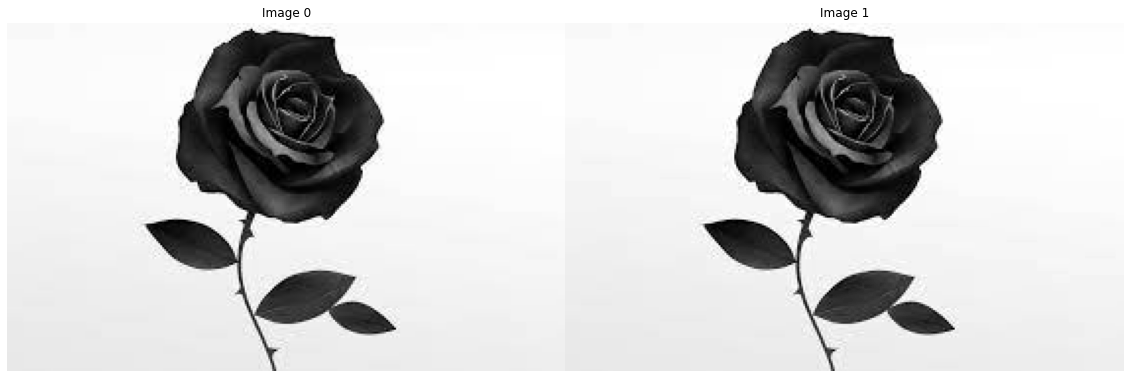

In [12]:
# Read Image 
image_color = imread("hoa_hong.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
# Display Image
ShowImage([image_color, image_gray], 1, 2)

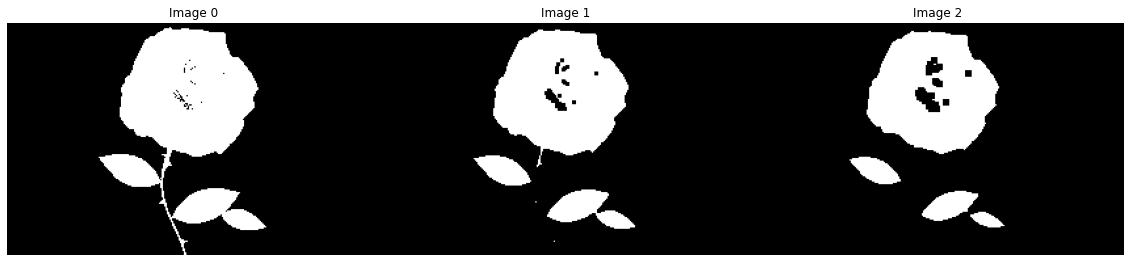

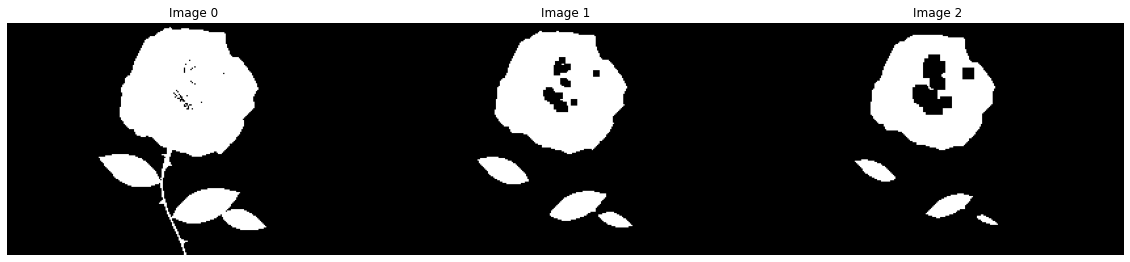

In [13]:
thresh, image_mask = cv2.threshold(image_gray,150,250,cv2.THRESH_BINARY_INV)

kernel = np.ones((3,3),np.uint8)
image_erosion01 = cv2.erode(image_mask,kernel,iterations = 1)
image_erosion02 = cv2.erode(image_mask,kernel,iterations = 2)

kernel = np.ones((5,5),np.uint8)
image_erosion03 = cv2.erode(image_mask,kernel,iterations = 1)
image_erosion04 = cv2.erode(image_mask,kernel,iterations = 2)

ShowImage([image_mask, image_erosion01, image_erosion02], 1, 3)
ShowImage([image_mask, image_erosion03, image_erosion04], 1, 3)

In [14]:
from skimage.measure import label, regionprops

image_mask = image_erosion04.copy()
image_label = label(image_mask) # Label each area in the image from 1 to n
print("index of each region from 1 to ", image_label.max())

index of each region from 1 to  4


In [15]:
regions = regionprops(image_label, intensity_image=image_gray, coordinates='rc')
ColList = ["label", "at_row", "at_col", 
          "area", "minr", "minc", "maxr", "maxc", "width", "height", 
           "max_intensity", "mean_intensity", "min_intensity",]

LabelDF = pd.DataFrame(columns = ColList)
for props in regions:
    RowList = []
    label = props.label
    if("label" in ColList):
        RowList.append(label)

    at_row, at_col = props.centroid
    if("at_row" in ColList):
        RowList.append(at_row)

    if("at_col" in ColList):
        RowList.append(at_col)

    if("area" in ColList):
        RowList.append(props.area)

    minr, minc, maxr, maxc = props.bbox
    if("minr" in ColList):
        RowList.append(minr)

    if("minc" in ColList):
        RowList.append(minc)

    if("maxr" in ColList):
        RowList.append(maxr)

    if("maxc" in ColList):
        RowList.append(maxc)

    if("width" in ColList):
        RowList.append(maxc - minc)

    if("height" in ColList):
        RowList.append(maxr - minr)

    if("max_intensity" in ColList):
        RowList.append(props.max_intensity)

    if("mean_intensity" in ColList):
        RowList.append(props.mean_intensity)

    if("min_intensity" in ColList):
        RowList.append(props.min_intensity)

    LabelDF.loc[label-1, 0 : len(RowList)] = RowList

In [16]:
display(LabelDF.head())


label      at_row      at_col  area minr minc maxr maxc width height  \
0     1   52.968177  137.150241  5185    9   91   97  186    95     88   
1     2  112.032028   94.686833   281  104   79  121  110    31     17   
2     3  138.772973  150.632432   370  130  133  149  169    36     19   
3     4  149.786885  178.983607    61  146  172  154  188    16      8   

  max_intensity mean_intensity min_intensity  
0         150.0      38.200193           0.0  
1          58.0      34.153025           5.0  
2          83.0           51.0          22.0  
3          54.0       42.42623          23.0

In [17]:
LabelDF = LabelDF.sort_values(by = "area", ascending = False)
LabelDF = LabelDF.reset_index(drop = True)
LabelDF.head()

label      at_row      at_col  area minr minc maxr maxc width height  \
0     1   52.968177  137.150241  5185    9   91   97  186    95     88   
1     3  138.772973  150.632432   370  130  133  149  169    36     19   
2     2  112.032028   94.686833   281  104   79  121  110    31     17   
3     4  149.786885  178.983607    61  146  172  154  188    16      8   

  max_intensity mean_intensity min_intensity  
0         150.0      38.200193           0.0  
1          83.0           51.0          22.0  
2          58.0      34.153025           5.0  
3          54.0       42.42623          23.0

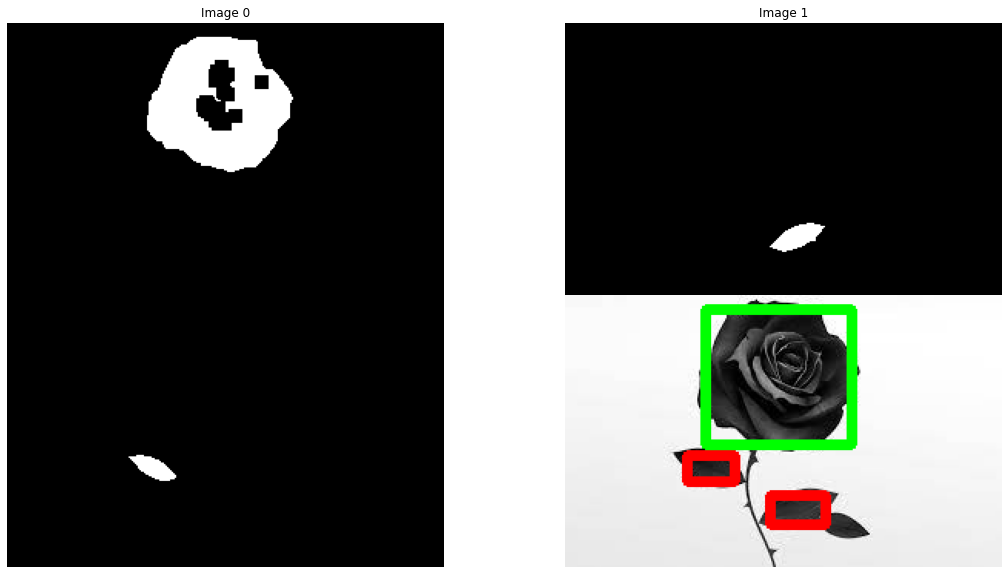

In [18]:
label01 = LabelDF.loc[0, "label"]
label02 = LabelDF.loc[1, "label"]
label03 = LabelDF.loc[2, "label"]

image_mask_area01 = image_label == label01
image_mask_area02 = image_label == label02
image_mask_area03 = image_label == label03

result = image_color.copy()

x = int(LabelDF.loc[0, "minc"])
y = int(LabelDF.loc[0, "minr"])
w = int(LabelDF.loc[0, "width"])
h = int(LabelDF.loc[0, "height"])
cv2.rectangle(result,(x,y),(x+w,y+h),(0,255,0),5) 


x = int(LabelDF.loc[1, "minc"])
y = int(LabelDF.loc[1, "minr"])
w = int(LabelDF.loc[1, "width"])
h = int(LabelDF.loc[1, "height"])
cv2.rectangle(result,(x,y),(x+w,y+h),(255,0,0),5) 

x = int(LabelDF.loc[2, "minc"])
y = int(LabelDF.loc[2, "minr"])
w = int(LabelDF.loc[2, "width"])
h = int(LabelDF.loc[2, "height"])
cv2.rectangle(result,(x,y),(x+w,y+h),(255,0,0),5) 

# x = int(LabelDF.loc[3, "minc"])
# y = int(LabelDF.loc[3, "minr"])
# w = int(LabelDF.loc[3, "width"])
# h = int(LabelDF.loc[3, "height"])
# cv2.rectangle(result,(x,y),(x+w,y+h),(255,0,0),5) 

ShowImage([image_mask_area01, image_mask_area02, image_mask_area03,result], 2, 2)

### Closing

Morphological closing kết hợp Dilation và Erosion mở rộng ảnh và sau đó co rút ảnh đã được mở rộng, sử dụng cùng một phần tử cấu trúc cho cả hai phép biến đổi. Morphological closing hữu ích để lấp đầy những lỗ nhỏ trong ảnh trong khi vẫn giữ nguyên hình dạng và kích thước của các đối tượng trong ảnh.

Closing (Đóng):

Là sự kết hợp giữa quá trình làm đậm và làm mòn.
Điền các lỗ nhỏ và nối các chi tiết gần nhau.


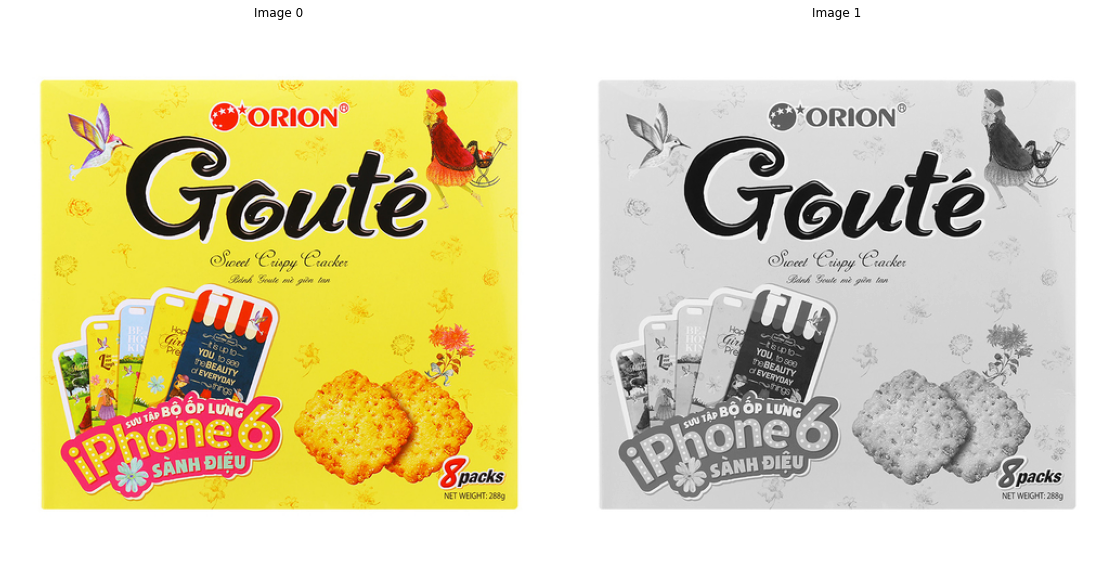

In [19]:
# Read Image 
image_color = imread("BanhQuy.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
# Display Image
ShowImage([image_color, image_gray], 1, 2)

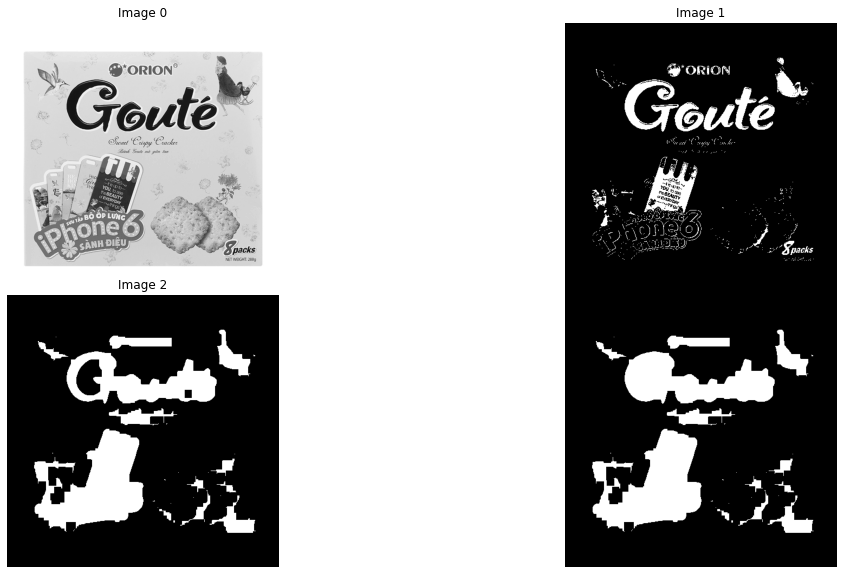

In [20]:
thresh, image_mask = cv2.threshold(image_gray,100,255,cv2.THRESH_BINARY_INV)
image_closing = cv2.morphologyEx(image_mask, cv2.MORPH_CLOSE, kernel,iterations = 3)

from scipy import ndimage as ndi
image_fill = ndi.binary_fill_holes(image_closing)

ShowImage([image_gray, image_mask, image_closing, image_fill], 2, 2)

In [21]:
from skimage.measure import label, regionprops

image_label = label(image_fill) # Label each area in the image from 1 to n
print("index of each region from 1 to ", image_label.max())

index of each region from 1 to  30


In [22]:
regions = regionprops(image_label, intensity_image=image_gray, coordinates='rc')
ColList = ["label", "at_row", "at_col", 
          "area", "minr", "minc", "maxr", "maxc", "width", "height", 
           "max_intensity", "mean_intensity", "min_intensity",]

LabelDF = pd.DataFrame(columns = ColList)
for props in regions:
    RowList = []
    label = props.label
    if("label" in ColList):
        RowList.append(label)

    at_row, at_col = props.centroid
    if("at_row" in ColList):
        RowList.append(at_row)

    if("at_col" in ColList):
        RowList.append(at_col)

    if("area" in ColList):
        RowList.append(props.area)

    minr, minc, maxr, maxc = props.bbox
    if("minr" in ColList):
        RowList.append(minr)

    if("minc" in ColList):
        RowList.append(minc)

    if("maxr" in ColList):
        RowList.append(maxr)

    if("maxc" in ColList):
        RowList.append(maxc)

    if("width" in ColList):
        RowList.append(maxc - minc)

    if("height" in ColList):
        RowList.append(maxr - minr)

    if("max_intensity" in ColList):
        RowList.append(props.max_intensity)

    if("mean_intensity" in ColList):
        RowList.append(props.mean_intensity)

    if("min_intensity" in ColList):
        RowList.append(props.min_intensity)

    LabelDF.loc[label-1, 0 : len(RowList)] = RowList

In [23]:
display(LabelDF.head())

label      at_row      at_col   area minr minc maxr maxc width height  \
0     1  115.255922  415.114724   2153   64  388  150  449    61     86   
1     2   86.216658  244.376384   1897   75  188   99  304   116     24   
2     3        77.0        90.0      1   77   90   78   91     1      1   
3     4  104.318681   80.562271    546   85   57  121  113    56     36   
4     5  160.491703  235.288526  15548  104  110  201  387   277     97   

  max_intensity mean_intensity min_intensity  
0         242.0      96.294008           7.0  
1         254.0     148.284133          72.0  
2          98.0           98.0          98.0  
3         252.0     160.166667          32.0  
4         255.0     101.135902           0.0

label      at_row      at_col   area minr minc maxr maxc width height  \
0      1  115.255922  415.114724   2153   64  388  150  449    61     86   
1      2   86.216658  244.376384   1897   75  188   99  304   116     24   
3      4  104.318681   80.562271    546   85   57  121  113    56     36   
4      5  160.491703  235.288526  15548  104  110  201  387   277     97   
6      7  224.529002  243.097448   1724  209  188  241  314   126     32   
8      9  351.760733  164.253253  20521  247   50  437  252   202    190   
11    12  315.887352  404.041502    506  302  376  334  420    44     32   
18    19  398.806397  355.762626    594  364  320  426  375    55     62   
20    21  418.786347  422.243877   1919  370  374  439  459    85     69   

   max_intensity mean_intensity min_intensity  
0          242.0      96.294008           7.0  
1          254.0     148.284133          72.0  
3          252.0     160.166667          32.0  
4          255.0     101.135902           0.0  
6          237.0     184.662993           8.0  
8          254.0     130.868086           4.0  
11         236.0     165.065217          51.0  
18         232.0     115.415825          53.0  
20         255.0     148.984367           0.0

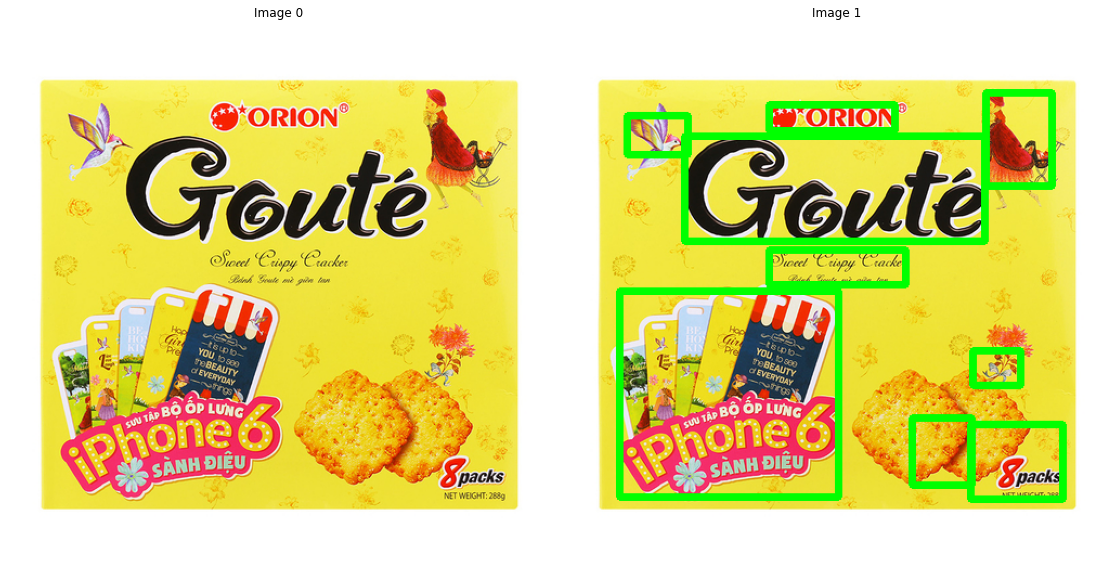

In [24]:
FindDF = LabelDF[LabelDF["area"] > 500]
display(FindDF)

result = image_color.copy()

for idx in FindDF.index:
    x = int(FindDF.loc[idx, "minc"])
    y = int(FindDF.loc[idx, "minr"])
    w = int(FindDF.loc[idx, "width"])
    h = int(FindDF.loc[idx, "height"])
    cv2.rectangle(result,(x,y),(x+w,y+h),(0,255,0),5) 

ShowImage([image_color, result], 1, 2)

### Gradient 

Trả về Kết quả sẽ trông giống như đường viền của đối tượng.

Gradient hình thái:

Tính toán sự khác biệt giữa hình ảnh sau khi làm đậm và hình ảnh sau khi làm mòn.
Được sử dụng để phát hiện biên của đối tượng.

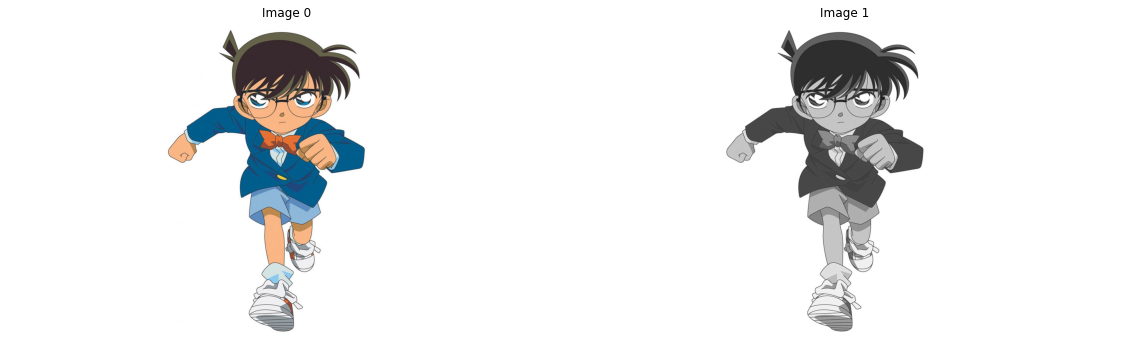

In [25]:
# Read Image 
image_color = imread("Conan3.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
# Display Image
ShowImage([image_color, image_gray], 1, 2)

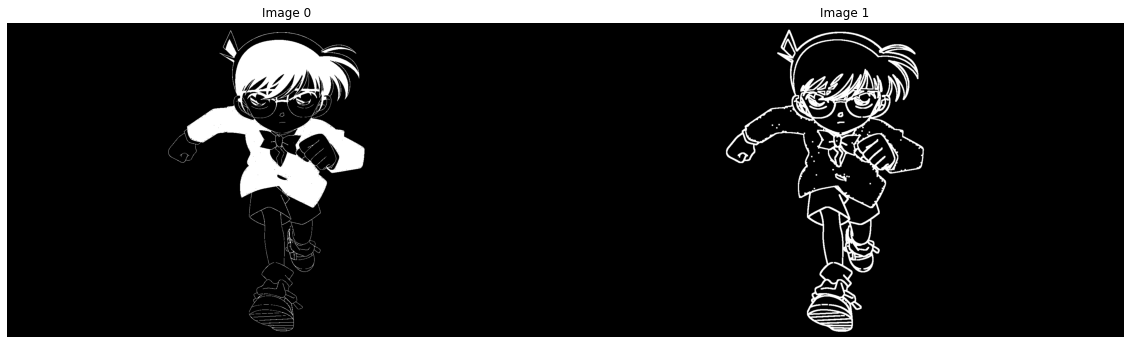

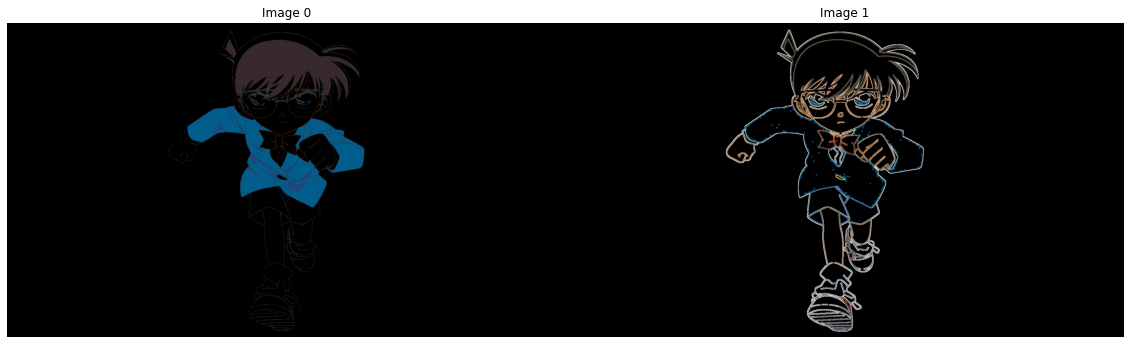

In [26]:
thresh, image_mask = cv2.threshold(image_gray,80,255,cv2.THRESH_BINARY_INV)

kernel = np.ones((5,5),np.uint8)
image_gradient = cv2.morphologyEx(image_mask, cv2.MORPH_GRADIENT, kernel)

image_mask_color = cv2.bitwise_and(image_color, image_color, mask = image_mask)
image_gradient_color = cv2.bitwise_and(image_color, image_color, mask = image_gradient)

ShowImage([image_mask, image_gradient], 1, 2)
ShowImage([image_mask_color, image_gradient_color], 1, 2)

### Opening

Morphological opening hữu ích để loại bỏ các đối tượng nhỏ từ một ảnh trong khi vẫn giữ nguyên hình dạng và kích thước của các đối tượng lớn hơn trong ảnh.

Opening (Mở):

Là sự kết hợp giữa quá trình làm mòn và làm đậm.
Loại bỏ nhiễu và các chi tiết nhỏ.

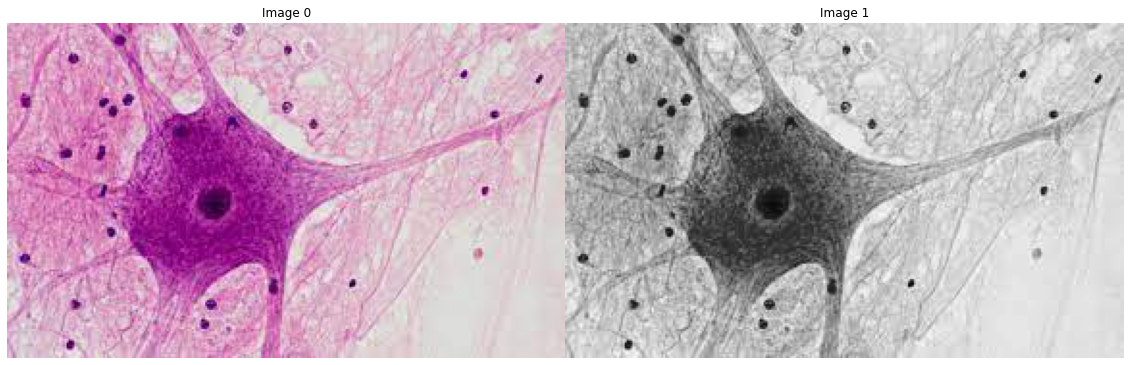

In [27]:
# Read Image 

image_color = imread("tebao.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
# Display Image
ShowImage([image_color, image_gray], 1, 2)

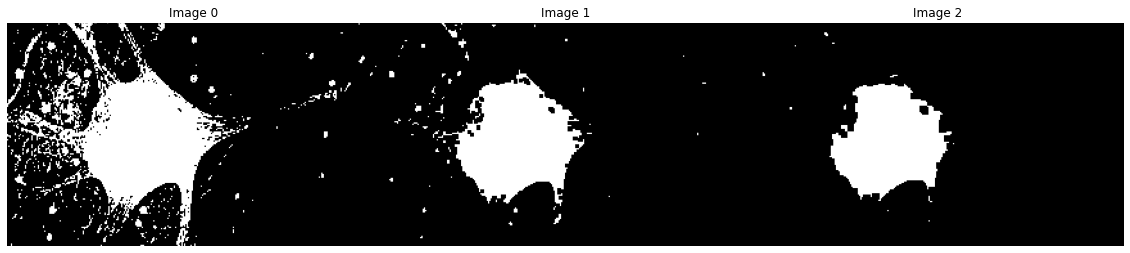

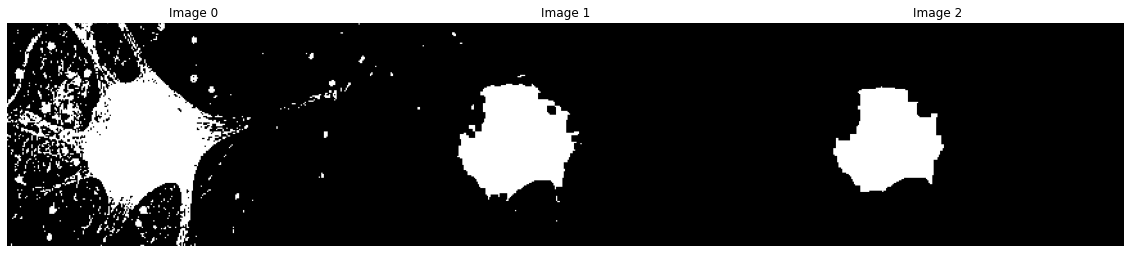

In [28]:
thresh, image_mask = cv2.threshold(image_gray,150,255,cv2.THRESH_BINARY_INV)

kernel = np.ones((3,3),np.uint8)
image_erosion01 = cv2.erode(image_mask,kernel,iterations = 1)
image_erosion02 = cv2.erode(image_mask,kernel,iterations = 2)

kernel = np.ones((5,5),np.uint8)
image_erosion03 = cv2.erode(image_mask,kernel,iterations = 1)
image_erosion04 = cv2.erode(image_mask,kernel,iterations = 2)

ShowImage([image_mask, image_erosion01, image_erosion02], 1, 3)
ShowImage([image_mask, image_erosion03, image_erosion04], 1, 3)

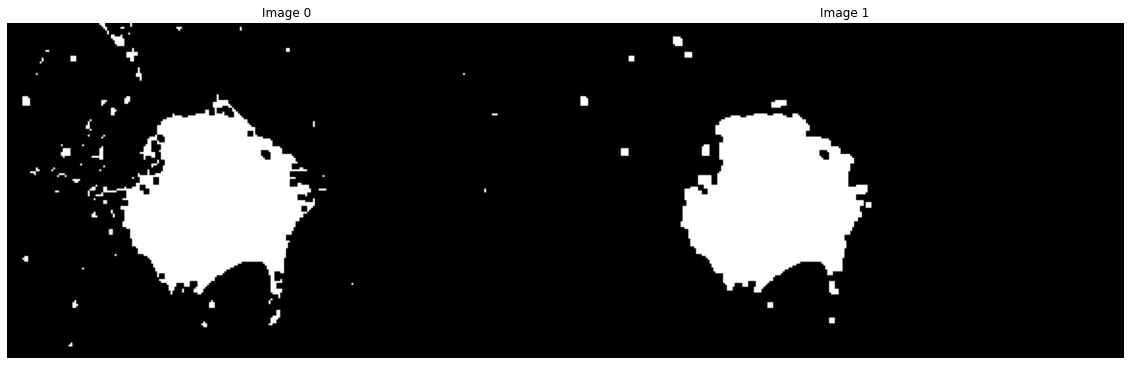

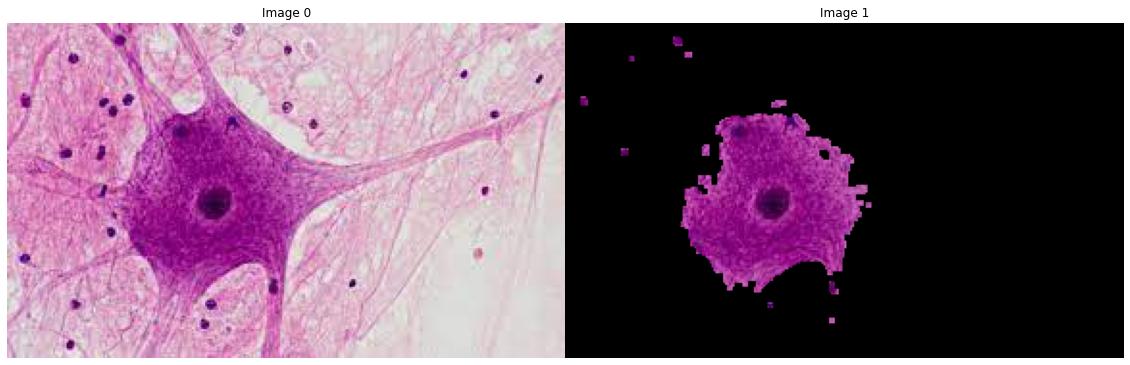

In [29]:
image_mask = image_erosion01.copy()

kernel = np.ones((3,3),np.uint8)
image_opening = cv2.morphologyEx(image_mask, cv2.MORPH_OPEN, kernel)
image_opening_color = cv2.bitwise_and(image_color, image_color, mask = image_opening)

ShowImage([image_mask, image_opening], 1, 2)
ShowImage([image_color, image_opening_color], 1, 2)

## Câu 2: Kiếm một ảnh biển số xe và thực hiện kết hợp các phương pháp Morphology để trích các con số trên biển số xe 

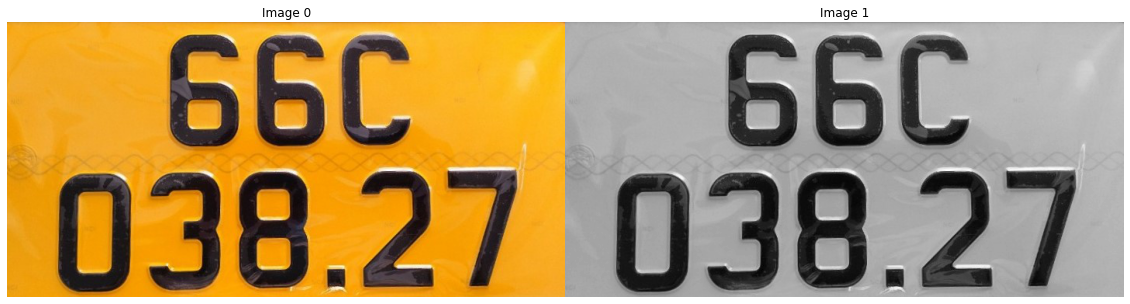

In [30]:
# Read Image 
image_color = imread("Bien_So_Xe.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
# Display Image
ShowImage([image_color, image_gray], 1, 2)

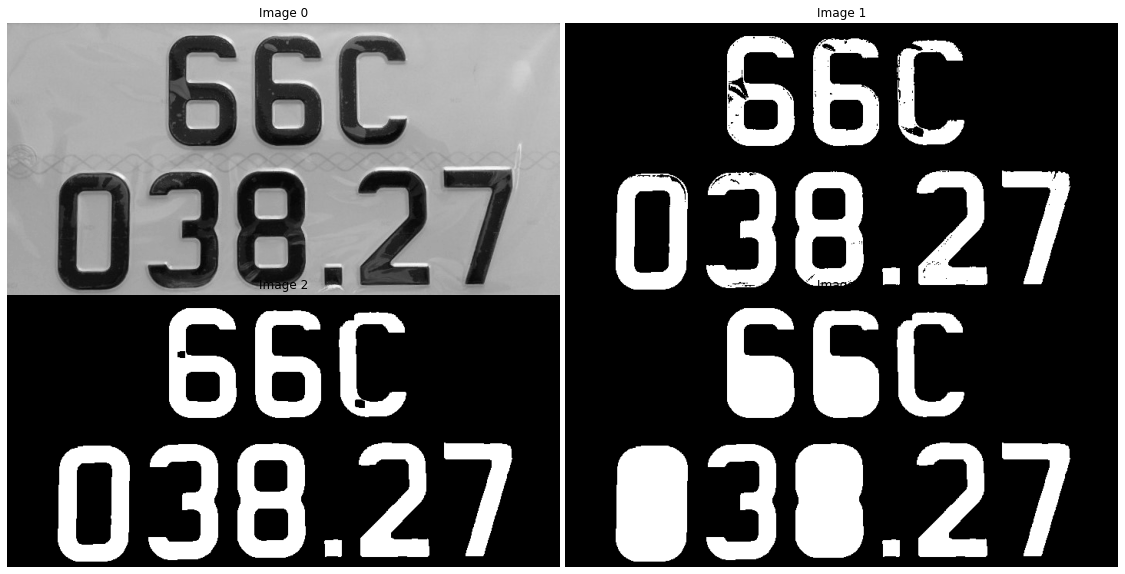

In [31]:
thresh, image_mask = cv2.threshold(image_gray,80,255,cv2.THRESH_BINARY_INV)
image_closing = cv2.morphologyEx(image_mask, cv2.MORPH_CLOSE, kernel,iterations = 3)

from scipy import ndimage as ndi
image_fill = ndi.binary_fill_holes(image_closing)

ShowImage([image_gray, image_mask, image_closing, image_fill], 2, 2)

In [32]:
from skimage.measure import label, regionprops

image_label = label(image_fill) # Label each area in the image from 1 to n
print("index of each region from 1 to ", image_label.max())

index of each region from 1 to  9


In [33]:
regions = regionprops(image_label, intensity_image=image_gray, coordinates='rc')
ColList = ["label", "at_row", "at_col", 
          "area", "minr", "minc", "maxr", "maxc", "width", "height", 
           "max_intensity", "mean_intensity", "min_intensity",]

LabelDF = pd.DataFrame(columns = ColList)
for props in regions:
    RowList = []
    label = props.label
    if("label" in ColList):
        RowList.append(label)

    at_row, at_col = props.centroid
    if("at_row" in ColList):
        RowList.append(at_row)

    if("at_col" in ColList):
        RowList.append(at_col)

    if("area" in ColList):
        RowList.append(props.area)

    minr, minc, maxr, maxc = props.bbox
    if("minr" in ColList):
        RowList.append(minr)

    if("minc" in ColList):
        RowList.append(minc)

    if("maxr" in ColList):
        RowList.append(maxr)

    if("maxc" in ColList):
        RowList.append(maxc)

    if("width" in ColList):
        RowList.append(maxc - minc)

    if("height" in ColList):
        RowList.append(maxr - minr)

    if("max_intensity" in ColList):
        RowList.append(props.max_intensity)

    if("mean_intensity" in ColList):
        RowList.append(props.mean_intensity)

    if("min_intensity" in ColList):
        RowList.append(props.min_intensity)

    LabelDF.loc[label-1, 0 : len(RowList)] = RowList

label      at_row      at_col   area minr minc maxr maxc width height  \
0     1   96.078809  250.605847   9098   17  211  160  299    88    143   
1     2   97.231158  361.904642   8704   20  323  160  409    86    140   
2     3   92.892525  465.570303   4950   22  432  159  520    88    137   
3     4  271.967147  506.775085   6727  192  458  341  550    92    149   
4     5  249.064807   621.05968   4876  192  569  340  658    89    148   
5     6  267.487524  343.451618  12143  193  300  342  389    89    149   
6     7  269.592285  240.091286   6507  194  184  345  275    91    151   
7     8   271.17867  112.557999  13052  196   66  347  160    94    151   
8     9  328.937238  424.466527    478  318  413  341  436    23     23   

  max_intensity mean_intensity min_intensity  
0         246.0      68.383271          12.0  
1         245.0      68.184743           9.0  
2         108.0      48.953131           7.0  
3         118.0      41.893563           4.0  
4         105.0      42.617514          12.0  
5         232.0      67.142222           8.0  
6         107.0      36.534655           4.0  
7         229.0      80.890362          11.0  
8          83.0      37.633891          13.0

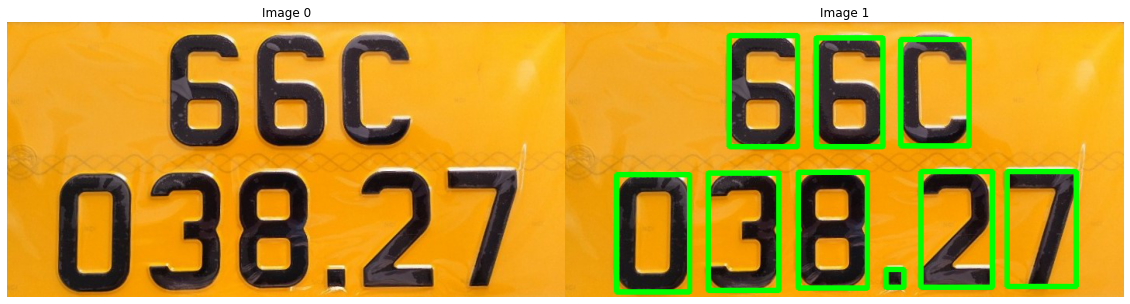

In [34]:
FindDF = LabelDF[LabelDF["area"] > 50]
display(FindDF)

result = image_color.copy()

for idx in FindDF.index:
    x = int(FindDF.loc[idx, "minc"])
    y = int(FindDF.loc[idx, "minr"])
    w = int(FindDF.loc[idx, "width"])
    h = int(FindDF.loc[idx, "height"])
    cv2.rectangle(result,(x,y),(x+w,y+h),(0,255,0),5) 

ShowImage([image_color, result], 1, 2)

## Câu 3: Kiếm một ảnh chụp biển hiệu shop bán hàng kết hợp các phương pháp Morphology để trích các thông tin cửa hiệu 

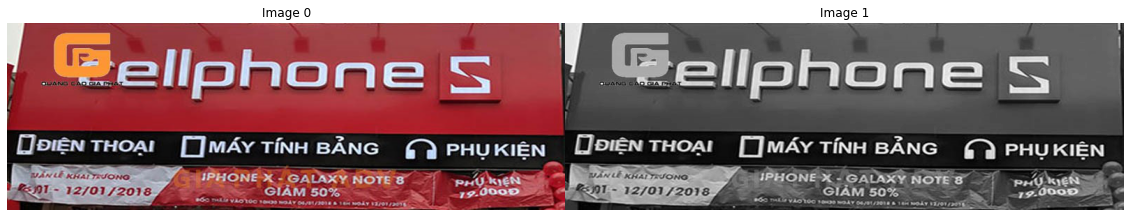

In [35]:
# Read Image 
image_color = imread("cellphone2.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
# Display Image
ShowImage([image_color, image_gray], 1, 2)

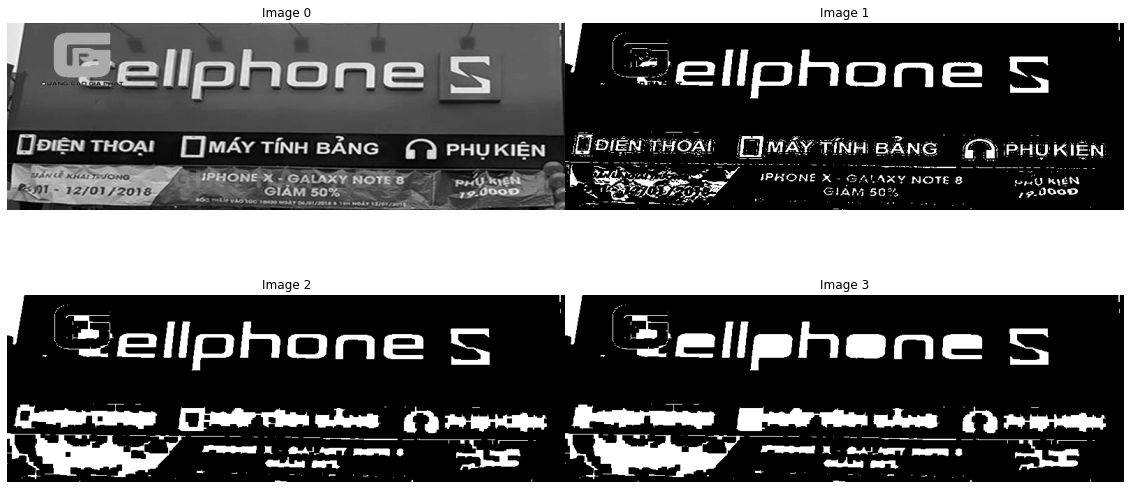

In [36]:
thresh, image_mask = cv2.threshold(1-image_gray,80,255,cv2.THRESH_BINARY_INV)
image_closing = cv2.morphologyEx(image_mask, cv2.MORPH_CLOSE, kernel,iterations = 3)

from scipy import ndimage as ndi
image_fill = ndi.binary_fill_holes(image_closing)

ShowImage([image_gray, image_mask, image_closing, image_fill], 2, 2)

In [37]:
from skimage.measure import label, regionprops

image_label = label(image_fill) # Label each area in the image from 1 to n
print("index of each region from 1 to ", image_label.max())


index of each region from 1 to  94


In [38]:
regions = regionprops(image_label, intensity_image=image_gray, coordinates='rc')
ColList = ["label", "at_row", "at_col", 
          "area", "minr", "minc", "maxr", "maxc", "width", "height", 
           "max_intensity", "mean_intensity", "min_intensity",]

LabelDF = pd.DataFrame(columns = ColList)
for props in regions:
    RowList = []
    label = props.label
    if("label" in ColList):
        RowList.append(label)

    at_row, at_col = props.centroid
    if("at_row" in ColList):
        RowList.append(at_row)

    if("at_col" in ColList):
        RowList.append(at_col)

    if("area" in ColList):
        RowList.append(props.area)

    minr, minc, maxr, maxc = props.bbox
    if("minr" in ColList):
        RowList.append(minr)

    if("minc" in ColList):
        RowList.append(minc)

    if("maxr" in ColList):
        RowList.append(maxr)

    if("maxc" in ColList):
        RowList.append(maxc)

    if("width" in ColList):
        RowList.append(maxc - minc)

    if("height" in ColList):
        RowList.append(maxr - minr)

    if("max_intensity" in ColList):
        RowList.append(props.max_intensity)

    if("mean_intensity" in ColList):
        RowList.append(props.mean_intensity)

    if("min_intensity" in ColList):
        RowList.append(props.min_intensity)

    LabelDF.loc[label-1, 0 : len(RowList)] = RowList

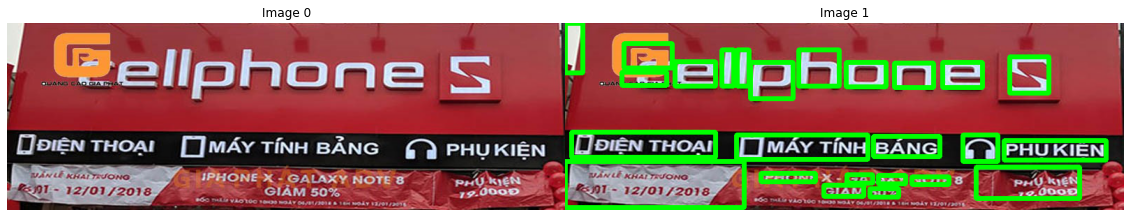

In [39]:
FindDF = LabelDF[LabelDF["area"] >200]
# display(FindDF)

result = image_color.copy()

for idx in FindDF.index:
    x = int(FindDF.loc[idx, "minc"])
    y = int(FindDF.loc[idx, "minr"])
    w = int(FindDF.loc[idx, "width"])
    h = int(FindDF.loc[idx, "height"])
    cv2.rectangle(result,(x,y),(x+w,y+h),(0,255,0),5) 

ShowImage([image_color, result], 1, 2)

## Câu 4: Chụp 1 dòng chat của bạn và sau đó dùng Morphology để trích các dòng chat đó ra 

### Dùng Dilation 

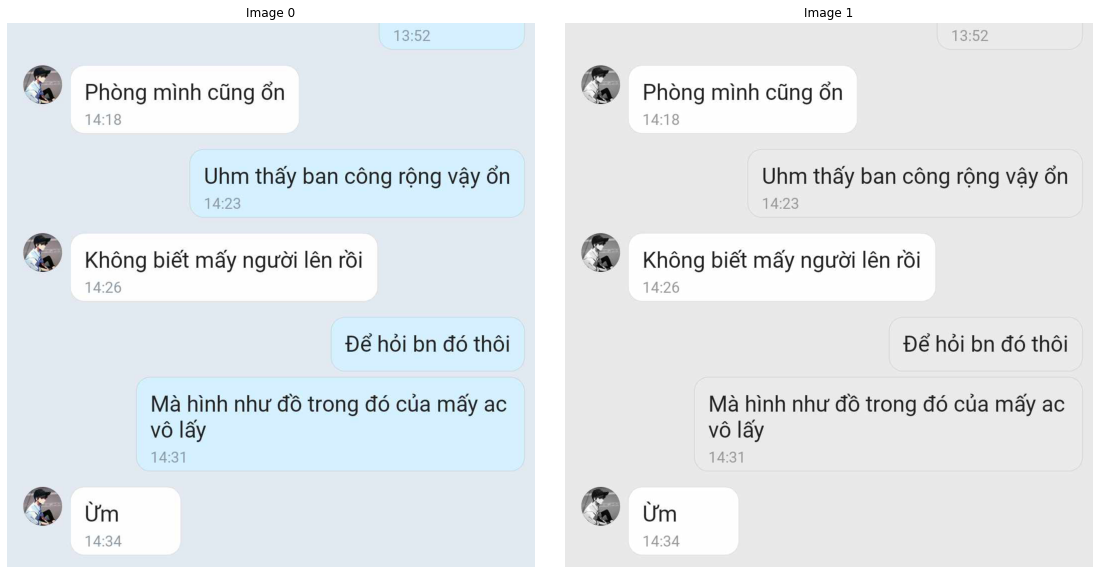

In [40]:
# Read Image 
image_color = imread("chat_zalo.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
# Display Image
ShowImage([image_color, image_gray], 1, 2)

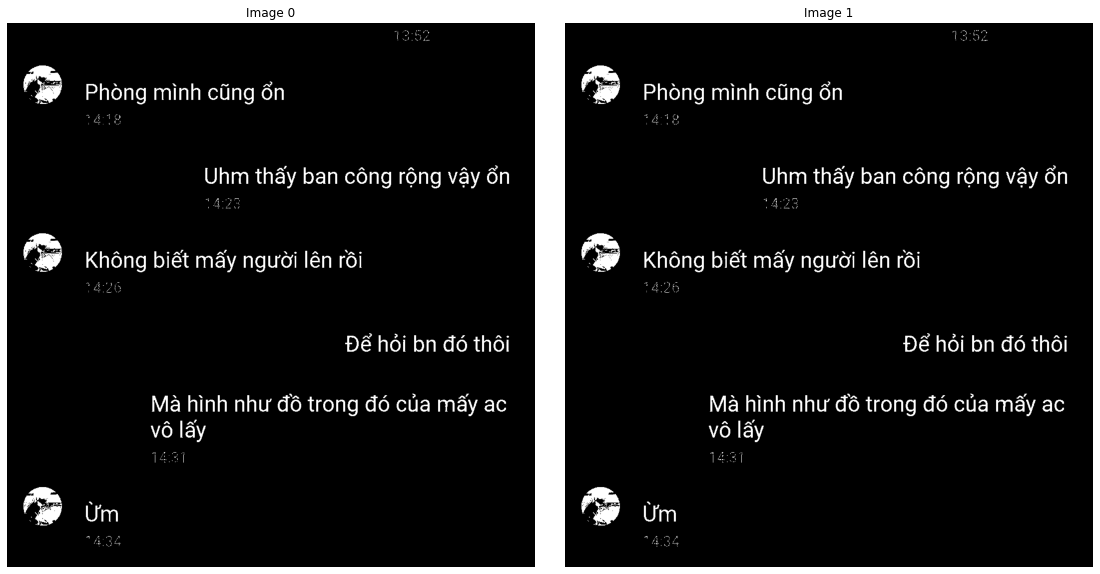

150.0


In [41]:
image_mask01 = (image_gray < 150).astype(np.uint8) * 255  # Change 0-1 to range 0-255
thresh, image_mask02 = cv2.threshold(image_gray,150,255,cv2.THRESH_BINARY_INV)
ShowImage([image_mask01, image_mask02], 1, 2)
print(thresh)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


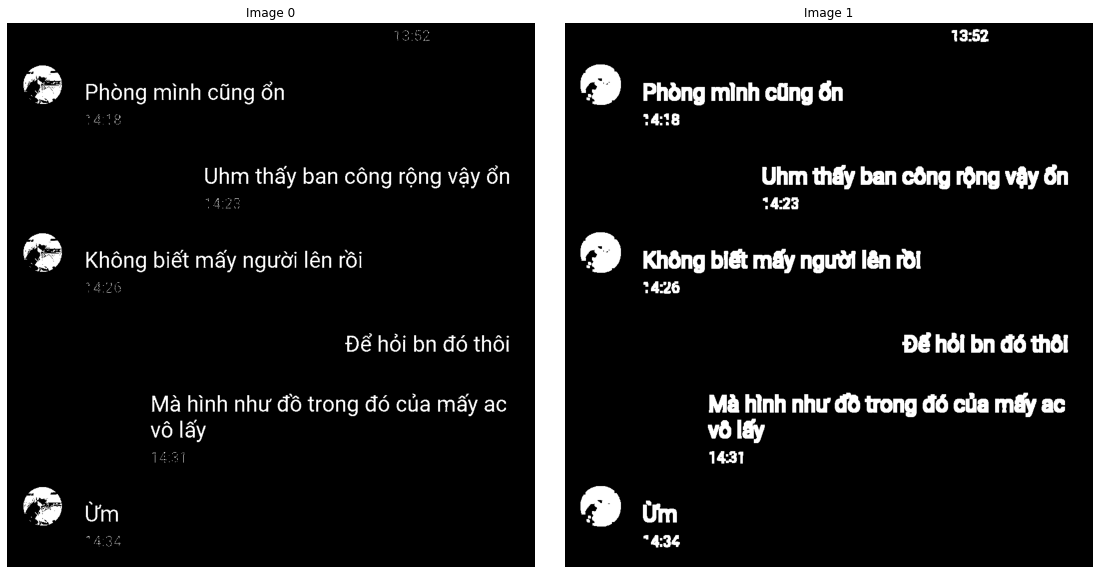

In [42]:
kernel = np.ones((3,3),np.uint8)
print(kernel)
image_dilated = cv2.dilate(image_mask01, kernel, iterations = 2)
ShowImage([image_mask01, image_dilated], 1, 2)

In [43]:
result = image_color.copy()

contours, hierarchy = cv2.findContours(image_dilated,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
count = 0
DataDF = pd.DataFrame(columns = ["x", "y", "w", "h"])
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    if(w * h > 300):
        cv2.rectangle(result,(x,y),(x+w,y+h),(0,255,0),2) 
        DataDF.loc[count,:] = (x,y,w,h)
        count = count + 1
DataDF = DataDF.astype(int)

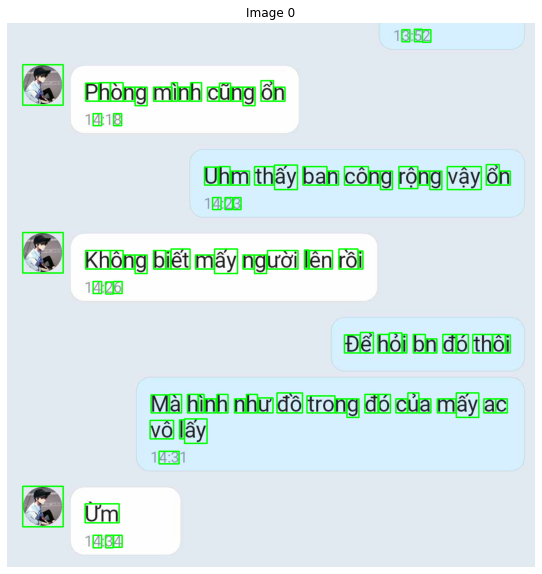

x     y   w   h
0  213  1025  17  24
1  197  1025  15  25
2  172  1025  17  25
3  156   962  68  38
4   31   927  81  81

In [44]:
ShowImage([result], 1, 1)
display(DataDF.head())

### Dùng Closing

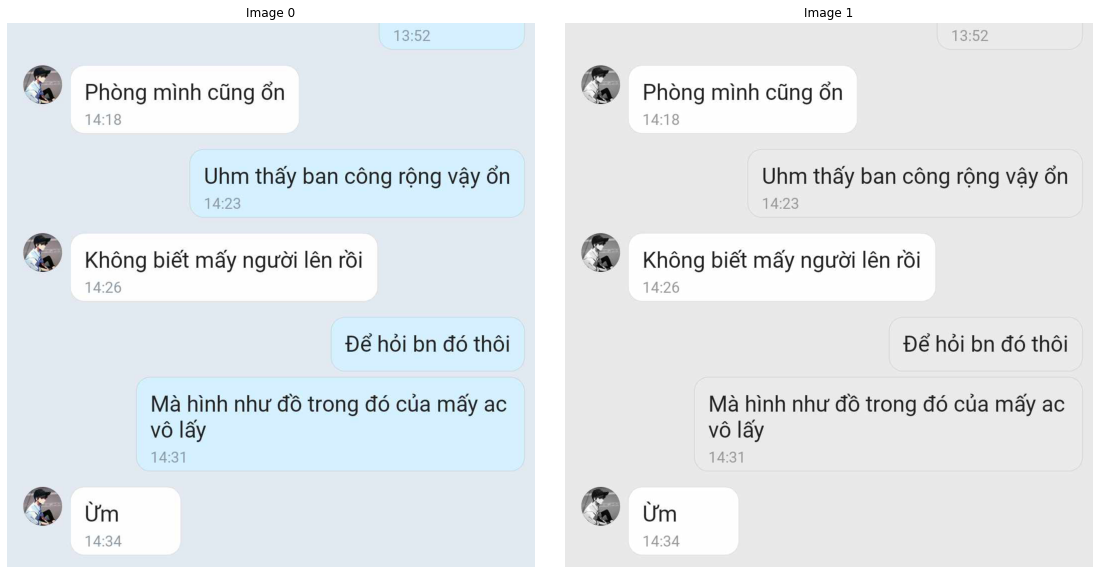

In [45]:
# Read Image 
image_color = imread("chat_zalo.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
# Display Image
ShowImage([image_color, image_gray], 1, 2)

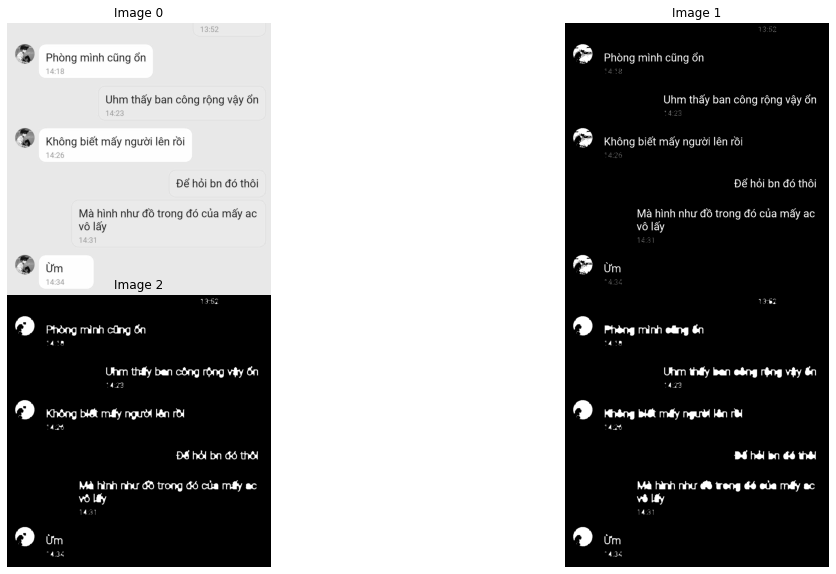

In [46]:
thresh, image_mask = cv2.threshold(image_gray,150,200,cv2.THRESH_BINARY_INV)
image_closing = cv2.morphologyEx(image_mask, cv2.MORPH_CLOSE, kernel,iterations = 3)

from scipy import ndimage as ndi
image_fill = ndi.binary_fill_holes(image_closing)

ShowImage([image_gray, image_mask, image_closing, image_fill], 2, 2)

In [47]:
from skimage.measure import label, regionprops

image_label = label(image_fill) # Label each area in the image from 1 to n
print("index of each region from 1 to ", image_label.max())

index of each region from 1 to  94


In [48]:
regions = regionprops(image_label, intensity_image=image_gray, coordinates='rc')
ColList = ["label", "at_row", "at_col", 
          "area", "minr", "minc", "maxr", "maxc", "width", "height", 
           "max_intensity", "mean_intensity", "min_intensity",]

LabelDF = pd.DataFrame(columns = ColList)
for props in regions:
    RowList = []
    label = props.label
    if("label" in ColList):
        RowList.append(label)

    at_row, at_col = props.centroid
    if("at_row" in ColList):
        RowList.append(at_row)

    if("at_col" in ColList):
        RowList.append(at_col)

    if("area" in ColList):
        RowList.append(props.area)

    minr, minc, maxr, maxc = props.bbox
    if("minr" in ColList):
        RowList.append(minr)

    if("minc" in ColList):
        RowList.append(minc)

    if("maxr" in ColList):
        RowList.append(maxr)

    if("maxc" in ColList):
        RowList.append(maxc)

    if("width" in ColList):
        RowList.append(maxc - minc)

    if("height" in ColList):
        RowList.append(maxr - minr)

    if("max_intensity" in ColList):
        RowList.append(props.max_intensity)

    if("mean_intensity" in ColList):
        RowList.append(props.mean_intensity)

    if("min_intensity" in ColList):
        RowList.append(props.min_intensity)

    LabelDF.loc[label-1, 0 : len(RowList)] = RowList
    

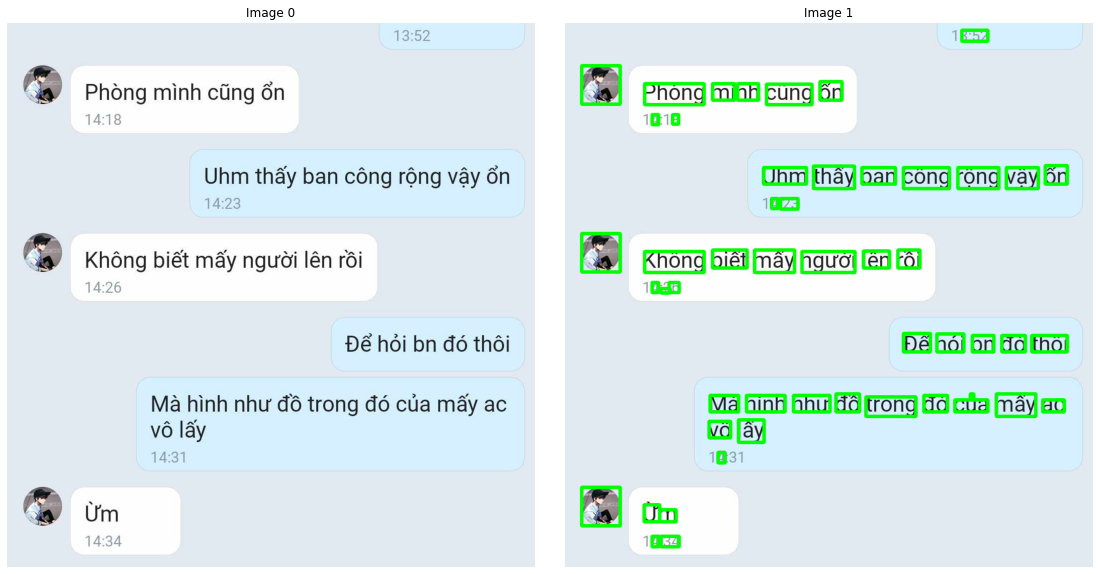

In [49]:
FindDF = LabelDF[LabelDF["area"] > 50]
# display(FindDF)

result = image_color.copy()

for idx in FindDF.index:
    x = int(FindDF.loc[idx, "minc"])
    y = int(FindDF.loc[idx, "minr"])
    w = int(FindDF.loc[idx, "width"])
    h = int(FindDF.loc[idx, "height"])
    cv2.rectangle(result,(x,y),(x+w,y+h),(0,255,0),5) 

ShowImage([image_color, result], 1, 2)

## Morphological Reconstruction

Morphological Reconstruction được sử dụng để tái tạo hình ảnh ban đầu từ một hình ảnh kết hợp với một mặt nạ (mask). Trong trường hợp bạn muốn loại bỏ nhiễu và làm rõ biên của các đối tượng, bạn có thể sử dụng Morphological Reconstruction để tái tạo hình ảnh sau khi thực hiện các phép toán như làm mòn (erosion) và làm đậm (dilation).

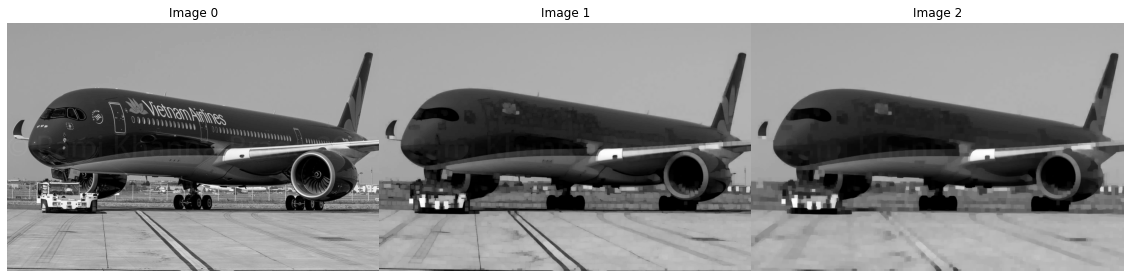

In [127]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc hình ảnh từ file
image = cv2.imread('May_bay.jpg', cv2.IMREAD_GRAYSCALE)

# Xác định kích thước kernel 
kernel_size = (8, 8)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

# Làm mòn hình ảnh
erosion = cv2.erode(image, kernel, iterations=1)

# Làm đậm hình ảnh đã làm mòn
dilated = cv2.dilate(erosion, kernel, iterations=1)

# Morphological Reconstruction
reconstructed = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)


ShowImage([image,dilated,reconstructed],1,3)


## Top-hat và Bottom-hat:

Top-hat là sự khác biệt giữa hình ảnh gốc và hình ảnh mở.
Bottom-hat là sự khác biệt giữa hình ảnh gốc và hình ảnh đóng.

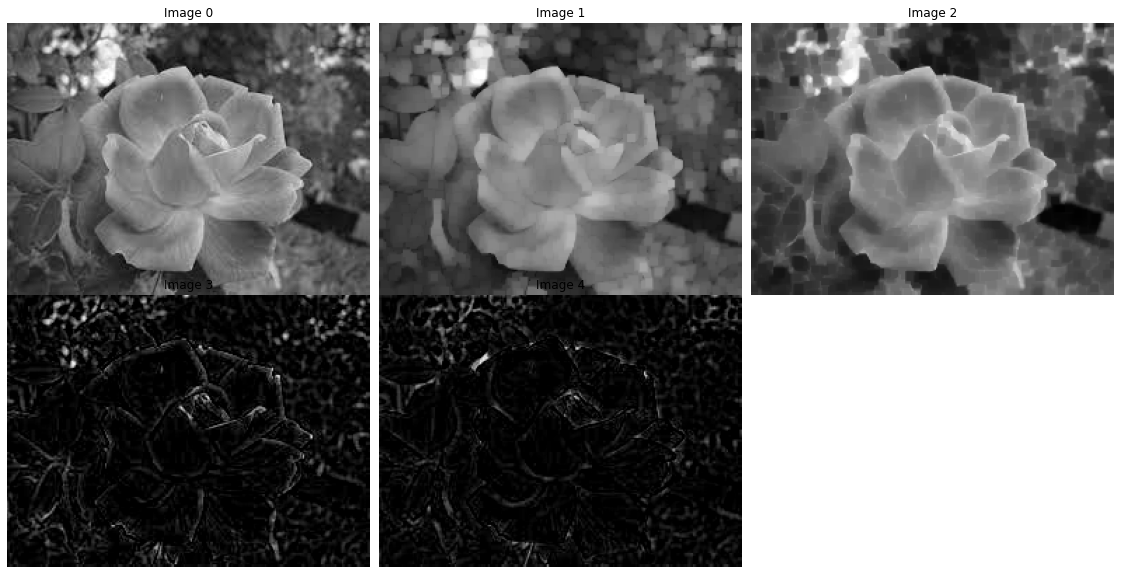

In [140]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc hình ảnh từ file
image = cv2.imread('hoahong.jpg', cv2.IMREAD_GRAYSCALE)

# Xác định kích thước kernel (có thể điều chỉnh tùy thuộc vào yêu cầu)
kernel_size = (5, 5)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

# Thực hiện phép toán mở
opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# Thực hiện phép toán đóng
closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# Tính toán Top-hat
tophat = cv2.subtract(image, opened_image)

# Tính toán Bottom-hat
bottomhat = cv2.subtract(closed_image, image)

ShowImage([image,opened_image,closed_image,tophat,bottomhat],2,3)

